کد مربوطه به مقاله ارسالی با عنوان:

### ترکیب روش آسیب مغزی بهینه و منظم‌سازی تُنُک ‌ در کوچک‌سازی یک مدل یادگیری عمیق برای شناسایی کووید۱۹

به لحاظ ماهیت تصادفی مقداردهی اولیه‌ی وزنهای شبکه‌های عصبی و روال آموزش شبکه، اختلافات جزیی در اجراهای مختلف وجود دارد.

M. Amintoosi, m.amintoosi at gmail.com

In [1]:
import torch
torch.manual_seed(1)
import random
random.seed(1)

In [ ]:
%cd ..
!rm -r CNN-Pruning

/content


In [ ]:
!git clone https://github.com/mamintoosi/CNN-Pruning

Cloning into 'CNN-Pruning'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 41 (delta 19), reused 35 (delta 13), pack-reused 0
Unpacking objects: 100% (41/41), done.


In [ ]:
%cd CNN-Pruning

/content/CNN-Pruning


In [4]:
%%time
# Transfer Learning: Train the VGG16 model
torch.manual_seed(1)
random.seed(1)
# Download a pre-trained VGG16 model and train it
#--use-cuda \
%run finetune_SpReg_pds.py --train \
  --train_epoch 0 --ds_name MNIST \
  --output_model vgg_mnist

MNIST
Finished fine tuning.
Wall time: 4.86 s


In [6]:
# fine_tuner.test()

In [8]:
%run finetune_SpReg_pds.py --test \
  --ds_name MNIST \
  --input_model vgg_mnist

MNIST
Accuracy : 0.13
Predict  0        1        2        3        4        5        6        7        8        9        
Actual
0        0        6        8        0        0        0        0        0        0        0        

1        0        8        11       0        1        0        0        0        0        0        

2        0        6        5        1        0        0        0        0        0        0        

3        0        4        4        0        0        0        0        0        0        0        

4        0        1        4        1        0        0        0        0        0        0        

5        0        2        2        0        0        0        0        0        0        0        

6        0        0        7        0        0        0        0        0        0        0        

7        0        3        3        1        0        1        0        0        0        0        

8        0        6        3        0        0        1        

C:\Programs\Anaconda3\envs\ptch\lib\site-packages\pycm\pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


In [ ]:
%%time
# Transfer Learning: Train the VGG16 model
torch.manual_seed(1)
random.seed(1)
# Download a pre-trained VGG16 model and train it
%run finetune_SpReg_cifar.py --train --use-cuda \
  --train_epoch 10 --ds_name 'STL10' \
  --output_model 'vgg_stl10'

Using CUDA...
Files already downloaded and verified
Files already downloaded and verified
Epoch:  1 / 10
Accuracy : 0.824
Epoch:  2 / 10
Accuracy : 0.829
Epoch:  3 / 10
Accuracy : 0.836
Epoch:  4 / 10
Accuracy : 0.844
Epoch:  5 / 10
Accuracy : 0.834
Epoch:  6 / 10
Accuracy : 0.847
Epoch:  7 / 10
Accuracy : 0.823
Epoch:  8 / 10
Accuracy : 0.838
Epoch:  9 / 10
Accuracy : 0.839
Epoch:  10 / 10
Accuracy : 0.859
Finished fine tuning.
CPU times: user 5min 38s, sys: 11.1 s, total: 5min 49s
Wall time: 5min 57s


In [18]:
# import itertools
# merged = list(itertools.chain.from_iterable(Labels))
# merged

In [ ]:
# %%time
# Test the transfer learning model
# %run finetune_SpReg_cifar.py --test --ds_name 'cifar10' \
  # --input_model 'vgg_cifar10'

In [ ]:
%%time
# Pruning the trained model using HSQGL12 method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_cifar.py --prune --use-cuda --train_epoch 10 --reg_name 'HSQGL12' --ds_name 'STL10' \
  --input_model 'vgg_stl10' --output_model 'vgg_HSQGL12'

Using CUDA...
Files already downloaded and verified
Files already downloaded and verified
Using Regularization:  HSQGL12
Accuracy : 0.859
Retraining with regularization ... 
Epoch:  1 / 10
Accuracy : 0.807
Epoch:  2 / 10
Accuracy : 0.829
Epoch:  3 / 10
Accuracy : 0.843
Epoch:  4 / 10
Accuracy : 0.845
Epoch:  5 / 10
Accuracy : 0.824
Epoch:  6 / 10
Accuracy : 0.847
Epoch:  7 / 10
Accuracy : 0.823
Epoch:  8 / 10
Accuracy : 0.836
Epoch:  9 / 10
Accuracy : 0.845
Epoch:  10 / 10
Accuracy : 0.819
Finished fine tuning.
CPU times: user 13min 27s, sys: 11.8 s, total: 13min 39s
Wall time: 13min 47s


In [ ]:
!ls -as models

total 1049288
     4 .        0 for_models.txt  524640 vgg_HSQGL12.pt
     4 ..  524640 vgg_cifar10.pt


In [ ]:
# %%time
# # Test the model with regularization
# %run finetune_SpReg.py --test --ds_name 'COVID-Radiography' \
#   --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/test'\
#   --input_model 'vgg_HSQGL12'

In [ ]:
# Pruning the trained model using OBD method
%%time
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_cifar.py --prune --use-cuda --ds_name 'STL10' \
  --input_model 'vgg_stl10' --output_model 'vgg_OBD' 

Using CUDA...
Files already downloaded and verified
Files already downloaded and verified
Accuracy : 0.859
5
Number of prunning iterations to reduce 70% filters 5
Iter:  1 / 5
Ranking filters.. 
Layers that will be prunned {10: 30, 5: 5, 19: 66, 21: 82, 24: 61, 17: 89, 26: 67, 28: 54, 14: 26, 2: 2, 7: 4, 12: 25, 0: 1}
Prunning filters.. 
Filters prunned 12.121212121212125%
Accuracy : 0.769
Fine tuning to recover from prunning iteration.
Epoch:  1 / 5


In [ ]:
# %%time
# # Test the pruned model using OBD method
# %run finetune_SpReg.py --test --ds_name 'COVID-Radiography' \
#   --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/test'\
#   --input_model 'vgg_OBD'

In [ ]:
# %%time
# # Train HSQGL12_OBD
# torch.manual_seed(1)
# random.seed(1)
# %run finetune_SpReg.py --prune --use-cuda --ds_name 'cifar10' \
#   --input_model 'vgg_HSQGL12' --output_model 'vgg_HSQGL12_OBD'

In [ ]:
# %%time
# # Test the HSQGL12_OBD model 
# %run finetune_SpReg.py --test --ds_name 'COVID-Radiography' \
#   --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/test'\
#   --input_model 'vgg_HSQGL12_OBD'

In [ ]:
# Print Model Sizes
%ls -s models

total 1276376
     0 for_models.txt  114132 vgg_HSQGL12_OBD.pt  113220 vgg_OBD.pt
524512 vgg_covid.pt    524512 vgg_HSQGL12.pt


In [12]:
def bar_filters_pruned(dic):
    filters_pruned = dict(Counter(dic[0])+Counter(dic[1])+Counter(dic[2])+\
                          Counter(dic[3])+Counter(dic[4]))
    sum_filters_pruned = 0
    dic_obd = {}
    for k,v in filters_pruned.items():
        dic_obd[map_layer_nums[k]] = v
        sum_filters_pruned += v
    print(sum_filters_pruned)
    print(dic_obd)
    keys_obd = list(dic_obd.keys())
    vals_obd = [float(dic_obd[k]) for k in keys_obd]
    sns.barplot(x=keys_obd, y=vals_obd)
    return dic_obd

In [13]:
import pickle as pkl
pkl_file = open('tmp/FashionMNIST/vgg_OBD.pkl','rb')
dic = pkl.load(pkl_file)
len(dic)

5

2560
{8: 338, 5: 129, 13: 339, 10: 339, 9: 335, 11: 318, 7: 148, 6: 146, 12: 300, 2: 32, 1: 23, 4: 65, 3: 48}


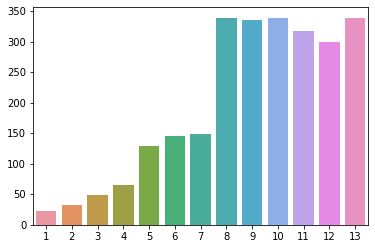

In [14]:
import seaborn as sns
map_layer_nums = {0:1,2:2,5:3,7:4,10:5,12:6,14:7,17:8,19:9,21:10,24:11,26:12,28:13}
# # OBD filters pruned
from collections import Counter
dic_obd = bar_filters_pruned(dic)

2560
{6: 148, 13: 319, 10: 334, 9: 334, 8: 335, 5: 145, 7: 139, 4: 58, 11: 306, 12: 314, 1: 29, 2: 41, 3: 58}


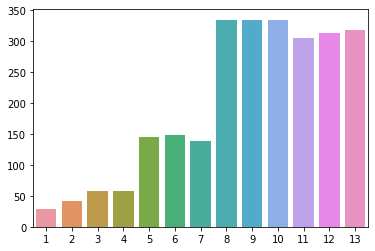

In [15]:
pkl_file = open('tmp/FashionMNIST/vgg_HSQGL12_OBD.pkl','rb')
dic = pkl.load(pkl_file)
dic_reg_obd = bar_filters_pruned(dic)

In [ ]:
# # Reg+OBD filters pruned
# from collections import Counter
# dic1 = {28: 252, 19: 37, 26: 92, 17: 20, 7: 7, 12: 3, 21: 40, 14: 10, 24: 39, 10: 9, 2: 2, 0: 1}
# dic2 = {28: 117, 21: 93, 26: 115, 17: 30, 19: 59, 24: 52, 12: 17, 14: 12, 5: 2, 0: 6, 10: 5, 7: 3, 2: 1}
# dic3 = {28: 42, 26: 79, 24: 71, 21: 91, 17: 63, 19: 74, 14: 28, 5: 6, 12: 28, 2: 5, 10: 12, 0: 7, 7: 6}
# dic4 = {14: 31, 28: 20, 24: 78, 19: 79, 10: 30, 17: 80, 26: 64, 12: 39, 21: 53, 2: 7, 7: 15, 0: 4, 5: 12}
# dic5 = {21: 58, 26: 53, 24: 88, 2: 6, 17: 86, 28: 30, 19: 70, 5: 15, 14: 33, 12: 31, 10: 31, 7: 9, 0: 2}
# filters_pruned = dict(Counter(dic1)+Counter(dic2)+Counter(dic3)+Counter(dic4)+Counter(dic5))
# filters_pruned
# sum_filters_pruned = 0
# dic_reg_obd = {}
# for k,v in filters_pruned.items():
#     dic_reg_obd[map_layer_nums[k]] = v
#     sum_filters_pruned += v
# print(sum_filters_pruned)
# print(dic_reg_obd)
# keys_reg_obd = list(dic_reg_obd.keys())
# vals_reg_obd = [float(dic_reg_obd[k]) for k in keys_reg_obd]
# sns.barplot(x=keys_reg_obd, y=vals_reg_obd)

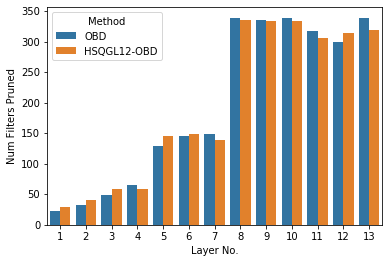

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

d = {
    'OBD': dic_obd,
    'HSQGL12-OBD': dic_reg_obd
}
df = pd.DataFrame(d)
df1 = df.stack().reset_index().rename(columns={'level_1': 'Method', 0: 'Num Filters Pruned'})
df1.rename(columns={"level_0": "Layer No."},inplace=True)
sns.barplot(x=df1['Layer No.'], y='Num Filters Pruned', data=df1, hue='Method')

In [1]:
from pycm import *
y_actu = [2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2] # or y_actu = numpy.array([2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2])
y_pred = [0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2] # or y_pred = numpy.array([0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2])
cm = ConfusionMatrix(actual_vector=y_actu, predict_vector=y_pred) # Create CM From Data
cm.classes
[0, 1, 2]
cm.table
{0: {0: 3, 1: 0, 2: 0}, 1: {0: 0, 1: 1, 2: 2}, 2: {0: 2, 1: 1, 2: 3}}
print(cm)

Predict 0       1       2       
Actual
0       3       0       0       

1       0       1       2       

2       2       1       3       





Overall Statistics : 

95% CI                                                            (0.30439,0.86228)
ACC Macro                                                         0.72222
ARI                                                               0.09206
AUNP                                                              0.66667
AUNU                                                              0.69444
Bangdiwala B                                                      0.37255
Bennett S                                                         0.375
CBA                                                               0.47778
CSI                                                               0.17778
Chi-Squared                                                       6.6
Chi-Squared DF                                                    4
Conditional Entropy

In [5]:
cm.F1_Macro

0.5651515151515151

In [9]:
import pickle as pkl
loss_file_name = 'tmp/MNIST/MNIST_loss.pkl'
with open(loss_file_name, 'rb') as f:
    Loss_trains, Loss_vals = pkl.load(f)
# Loss_trains

In [10]:
type(Loss_trains)

list

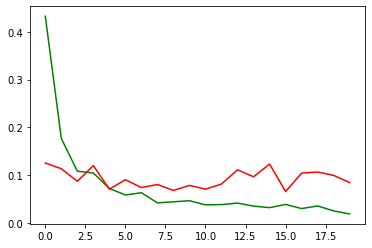

In [12]:
import matplotlib.pyplot as plt
plt.plot(Loss_trains,'g', Loss_vals, 'r')
plt.show()

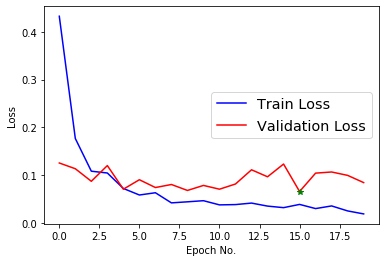

15


In [22]:
fig, ax = plt.subplots()
ax.plot(Loss_trains, label='Train Loss', color='blue')
ax.plot(Loss_vals, label='Validation Loss', color = 'red')
ax.plot(np.argmin(Loss_vals), np.min(Loss_vals),'g*')
legend = ax.legend(loc='center right', fontsize='x-large')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.show()
print(np.argmin(Loss_vals))

In [16]:
np.argmin(Loss_vals)

15

In [17]:
np.inf

inf